## Reading the dataset:

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error
from sklearn.model_selection import GridSearchCV
import numpy as np

import warnings
warnings.filterwarnings('ignore')

match_data = pd.read_csv('match_data.csv')
match_data = match_data.drop(columns=['ID','Top', 'Jungle', 'Mid', 'Bot', 'Support', 'Enemy Top', 'Enemy Jungle', 'Enemy Mid', 'Enemy Bot', 'Enemy Support'])

### Splitting the dataset:

In [2]:
train, test = train_test_split(match_data, test_size=0.2)
x_train, y_train = train.drop(columns=['Victory']), train['Victory']
x_test, y_test = test.drop(columns=['Victory']), test['Victory']

### Hyperparameter tuning:

In [6]:
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : [0.1, 0.5, 1, 5, 10, 50, 100],
}

logistic = LogisticRegression()

grid_logistic = GridSearchCV(logistic, param_grid=parameters, scoring='accuracy', cv=10)

grid_logistic.fit(x_train, y_train)

print("Tuned Hyperparameters :", grid_logistic.best_params_)
print("Accuracy :",grid_logistic.best_score_)


Tuned Hyperparameters : {'C': 0.5, 'penalty': 'l2'}
Accuracy : 0.9275299341415044


### Training the model:

In [7]:
logistic = LogisticRegression(C=50, penalty='l2')
logistic.fit(x_train, y_train)

y_train_pred = logistic.predict(x_train)

predictions = logistic.predict(x_test)

print("Testing results:\n\n %s" % classification_report(y_test, predictions))

training_mse = mean_squared_error(y_train.astype(int), y_train_pred.astype(int))
testing_mse = mean_squared_error(y_test.astype(int), predictions.astype(int))

print("Training MSE: %s" % training_mse)
print("Testing MSE: %s" % testing_mse)

print("Variance: %s" % abs(testing_mse - training_mse))

cm = confusion_matrix(y_test, predictions)
print(cm)

Testing results:

               precision    recall  f1-score   support

       False       0.92      0.91      0.92      1643
        True       0.92      0.93      0.92      1687

    accuracy                           0.92      3330
   macro avg       0.92      0.92      0.92      3330
weighted avg       0.92      0.92      0.92      3330

Training MSE: 0.0757735055572244
Testing MSE: 0.07897897897897897
Variance: 0.003205473421754576
[[1503  140]
 [ 123 1564]]


### Confusion matrix

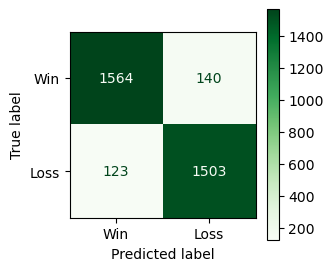

In [13]:
# cm1 = sns.heatmap(cm, annot=True, cmap='Greens', fmt='g')
# cm1.set_title('Logistic Regression Confusion Matrix\n\n');
# cm1.set_xlabel('\nPredicted')
# cm1.set_ylabel('Actual');
# temp = ['Win', 'Lose']

# cm1.xaxis.set_ticklabels(temp, fontsize=18)
# cm1.yaxis.set_ticklabels(temp, fontsize=18)

disp = ConfusionMatrixDisplay.from_predictions(
                  predictions,
                  y_test, 
                  labels=[1,0],
                  cmap=plt.cm.Greens,
                  display_labels=['Win','Loss'], 
                  values_format='',  
) 
fig = disp.ax_.get_figure() 
fig.set_figwidth(3)
fig.set_figheight(3) 

plt.show()

In [11]:
import pickle
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(logistic, file)